<a href="https://colab.research.google.com/github/Farazmghm/Portfolio/blob/main/wethear_prediction_and_analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
df=pd.read_csv(r"/content/drive/MyDrive/dataset.csv",sep=";")
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
df.shape

(9471, 17)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


In [59]:
df.isnull().sum()

,0
Date,114
Time,114
CO(GT),114
PT08.S1(CO),114
NMHC(GT),114
C6H6(GT),114
PT08.S2(NMHC),114
NOx(GT),114
PT08.S3(NOx),114
NO2(GT),114


In [60]:
df.duplicated().sum()

np.int64(113)

In [61]:
df=df.drop_duplicates()
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9353,04/04/2005,11.00.00,"2,4",1163.0,-200.0,"11,4",1027.0,353.0,604.0,179.0,1264.0,1269.0,"24,3","23,7","0,7119",NaN,NaN
9354,04/04/2005,12.00.00,"2,4",1142.0,-200.0,"12,4",1063.0,293.0,603.0,175.0,1241.0,1092.0,"26,9","18,3","0,6406",NaN,NaN
9355,04/04/2005,13.00.00,"2,1",1003.0,-200.0,"9,5",961.0,235.0,702.0,156.0,1041.0,770.0,"28,3","13,5","0,5139",NaN,NaN
9356,04/04/2005,14.00.00,"2,2",1071.0,-200.0,"11,9",1047.0,265.0,654.0,168.0,1129.0,816.0,"28,5","13,1","0,5028",NaN,NaN


<Axes: >

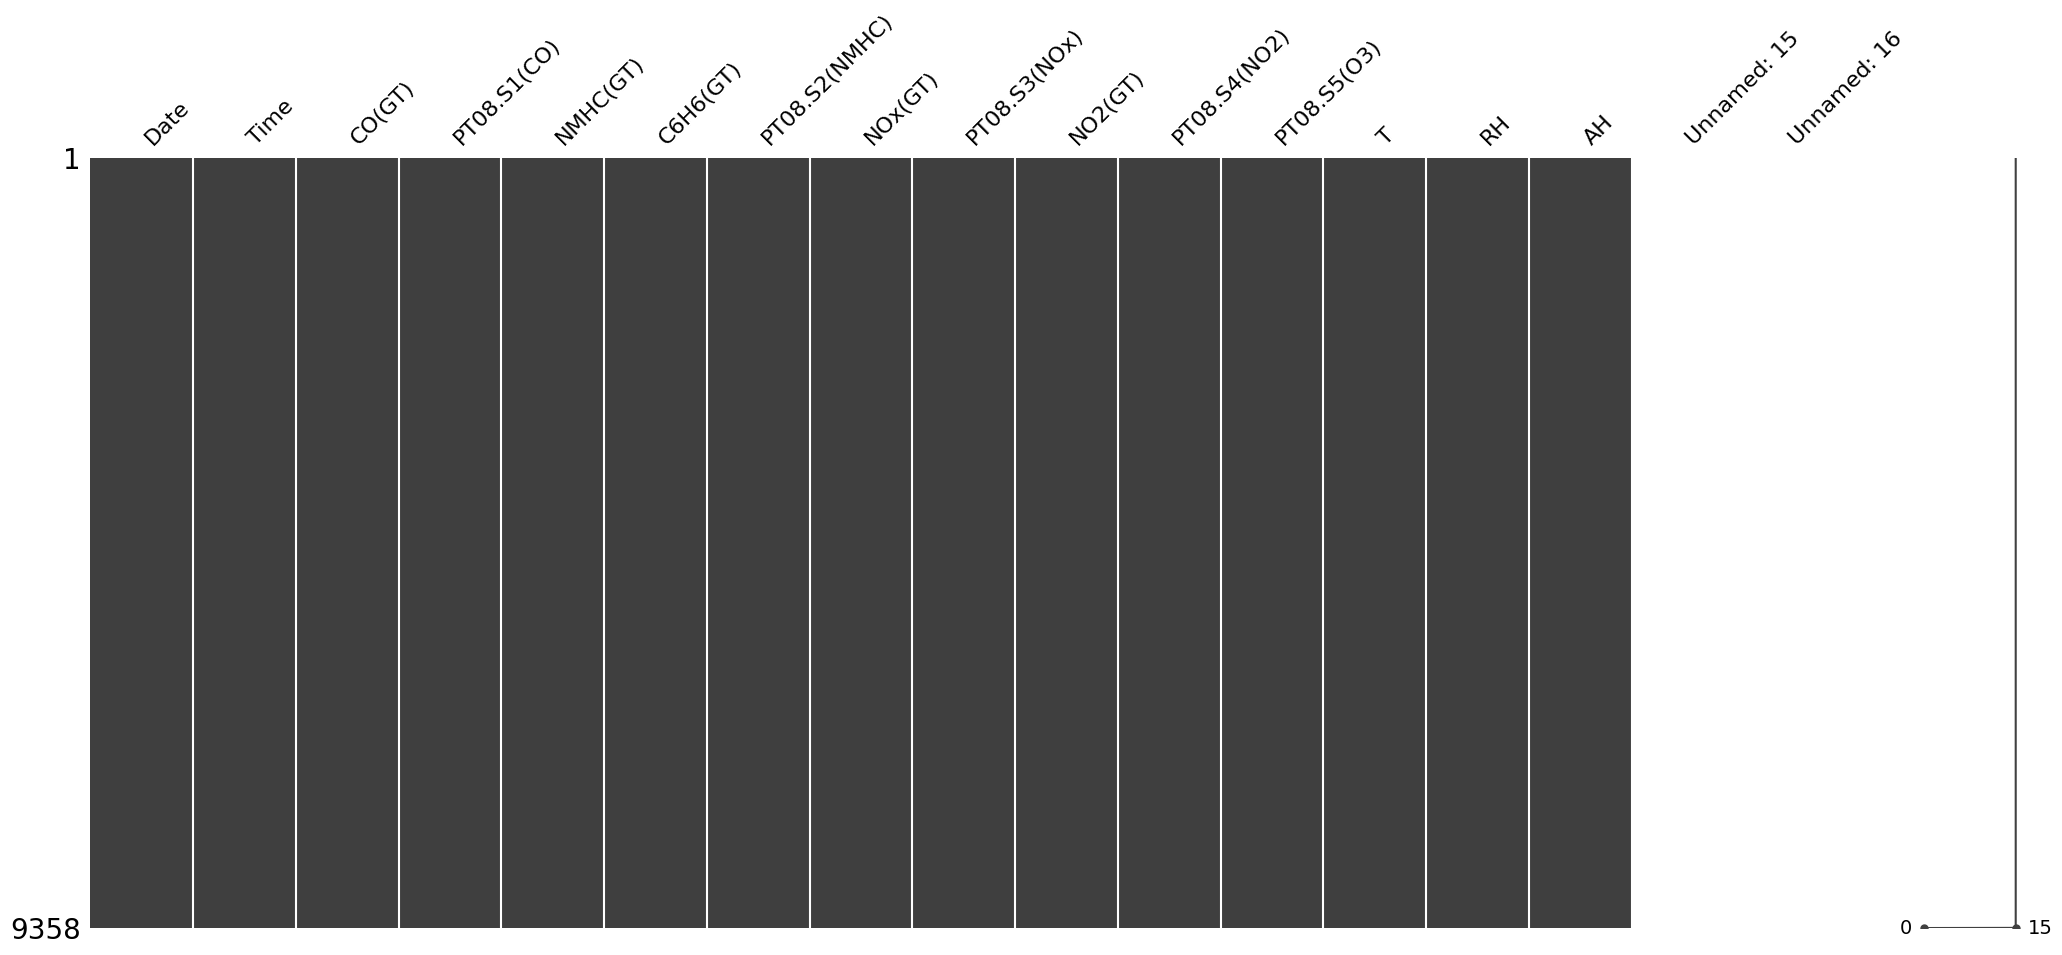

In [62]:
import missingno as msno

msno.matrix(df)

In [63]:
df.nunique()

,0
Date,391
Time,24
CO(GT),104
PT08.S1(CO),1042
NMHC(GT),430
C6H6(GT),408
PT08.S2(NMHC),1246
NOx(GT),926
PT08.S3(NOx),1222
NO2(GT),284


In [64]:
df.describe()

,PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,1048.990061,-159.090093,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,NaN,NaN
std,329.832710,139.789093,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,921.000000,-200.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,NaN,NaN
50%,1053.000000,-200.000000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,NaN,NaN
75%,1221.000000,-200.000000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,NaN,NaN
max,2040.000000,1189.000000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,NaN,NaN


In [65]:
# TODO: بررسی تعداد مقادیر نامعتبر در ستون‌های عددی
missing_percentage = df.isna().sum() / len(df) * 100
for column in df.columns:
    missing_rate = missing_percentage[column]

    if missing_rate < 5:
        print(f"column'{column}': below of 5%")
    elif 5 <= missing_rate <= 30:
        print(f"column'{column}': between 5% and 30%")
    else:
        print(f"column'{column}': above 30%")

column'Date': below of 5%
column'Time': below of 5%
column'CO(GT)': below of 5%
column'PT08.S1(CO)': below of 5%
column'NMHC(GT)': below of 5%
column'C6H6(GT)': below of 5%
column'PT08.S2(NMHC)': below of 5%
column'NOx(GT)': below of 5%
column'PT08.S3(NOx)': below of 5%
column'NO2(GT)': below of 5%
column'PT08.S4(NO2)': below of 5%
column'PT08.S5(O3)': below of 5%
column'T': below of 5%
column'RH': below of 5%
column'AH': below of 5%
column'Unnamed: 15': above 30%
column'Unnamed: 16': above 30%


In [66]:
# در ابتدا یک کپی از دیتافریم اصلی میگیریم.
df_copy = df.copy()
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9358 entries, 0 to 9357
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.3+ MB


In [67]:
cols_to_convert = ['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH']


for col in cols_to_convert:
    df_copy[col] = df_copy[col].astype(str).str.replace(',', '.').astype(float)

In [68]:
df_copy.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [69]:
def clean_and_convert(df_copy):

    df_copy['Date'] = pd.to_datetime(df_copy['Date'], format='%d/%m/%Y', errors='coerce')


    df_copy['Hour'] = df_copy['Time'].str.split('.').str[0]
    df_copy['Hour'] = pd.to_numeric(df_copy['Hour'], errors='coerce').astype(float)
    return df_copy
df_copy = clean_and_convert(df_copy)

In [70]:
df_copy.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16,Hour
0,2004-03-10,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN,18.0
1,2004-03-10,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN,19.0
2,2004-03-10,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN,20.0
3,2004-03-10,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN,21.0
4,2004-03-10,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN,22.0


In [71]:
# TODO: حذف ستون نامعتبر

df_copy = df_copy.drop(columns=['Unnamed: 15', 'Unnamed: 16'])
df_copy.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Hour
0,2004-03-10,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,18.0
1,2004-03-10,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,19.0
2,2004-03-10,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,20.0
3,2004-03-10,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,21.0
4,2004-03-10,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,22.0


In [72]:
# TODO : مشکل اعداد -200 را برطرف کنید.

df_copy=df_copy.replace(-200, float('nan'), inplace=False)

In [73]:
df_copy.describe()

,Date,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Hour
count,9357,7674.000000,8991.000000,914.000000,8991.000000,8991.000000,7718.000000,8991.000000,7715.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,9357.000000
mean,2004-09-21 04:30:05.193972480,2.152750,1099.833166,218.811816,10.083105,939.153376,246.896735,835.493605,113.091251,1456.264598,1022.906128,18.317829,49.234201,1.025530,11.498557
min,2004-03-10 00:00:00,0.100000,647.000000,7.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700,0.000000
25%,2004-06-16 00:00:00,1.100000,937.000000,67.000000,4.400000,734.500000,98.000000,658.000000,78.000000,1227.000000,731.500000,11.800000,35.800000,0.736800,5.000000
50%,2004-09-21 00:00:00,1.800000,1063.000000,150.000000,8.200000,909.000000,180.000000,806.000000,109.000000,1463.000000,963.000000,17.800000,49.600000,0.995400,11.000000
75%,2004-12-28 00:00:00,2.900000,1231.000000,297.000000,14.000000,1116.000000,326.000000,969.500000,142.000000,1674.000000,1273.500000,24.400000,62.500000,1.313700,18.000000
max,2005-04-04 00:00:00,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,23.000000
std,NaN,1.453252,217.080037,204.459921,7.449820,266.831429,212.979168,256.817320,48.370108,346.206794,398.484288,8.832116,17.316892,0.403813,6.923182


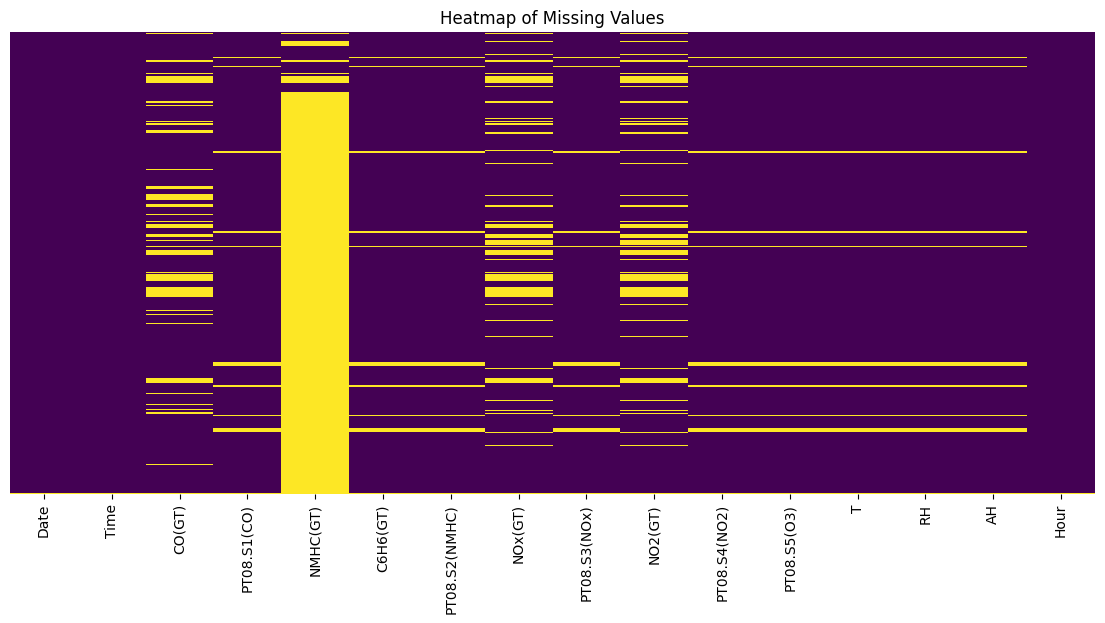

In [74]:
# TODO: نمودار پراکندگی داده های گمشده را رسم کنید.
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(14, 6))


sns.heatmap(df_copy.isnull(), cmap='viridis', cbar=False, yticklabels=False)

plt.title('Heatmap of Missing Values')
plt.show()



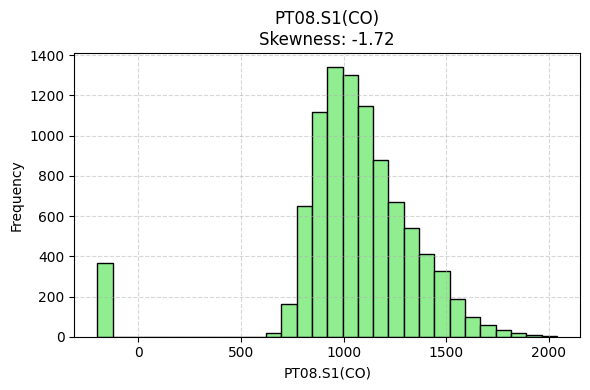

PT08.S1(CO) Skewness: -1.72


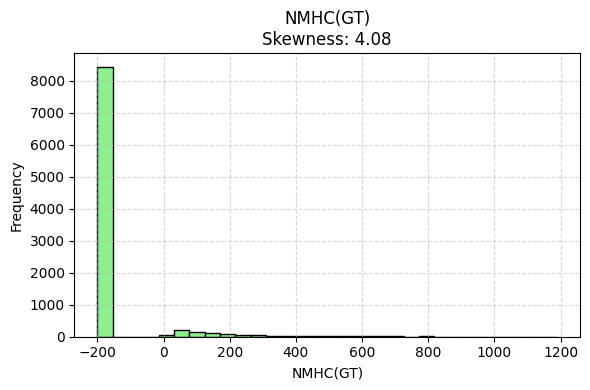

NMHC(GT) Skewness: 4.08


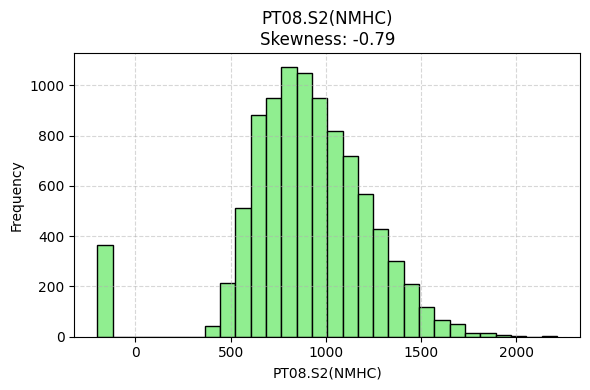

PT08.S2(NMHC) Skewness: -0.79


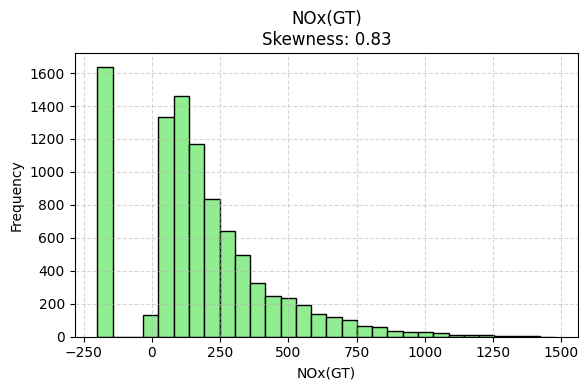

NOx(GT) Skewness: 0.83


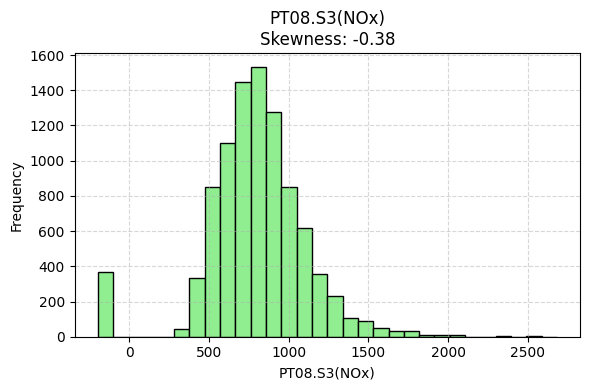

PT08.S3(NOx) Skewness: -0.38


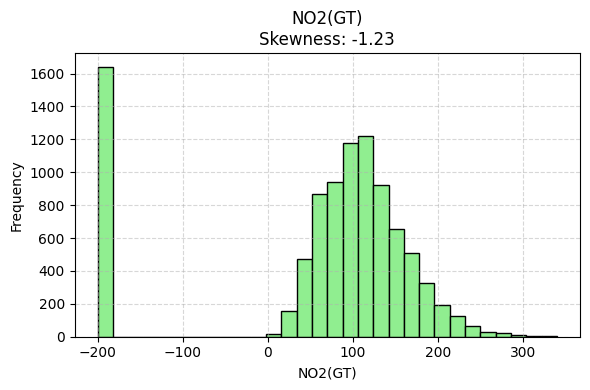

NO2(GT) Skewness: -1.23


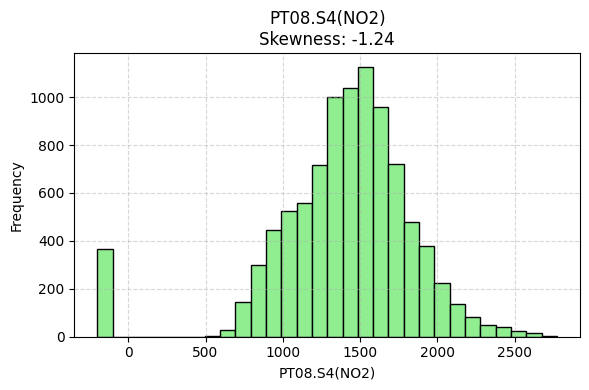

PT08.S4(NO2) Skewness: -1.24


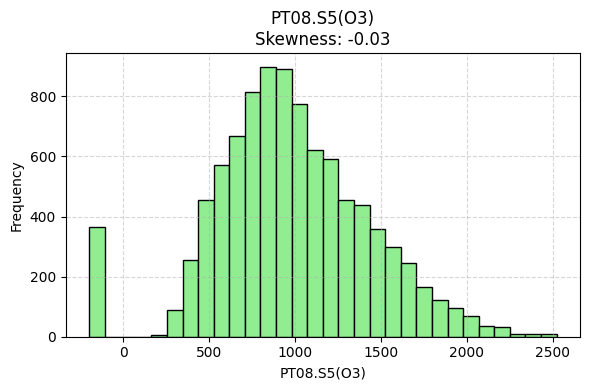

PT08.S5(O3) Skewness: -0.03


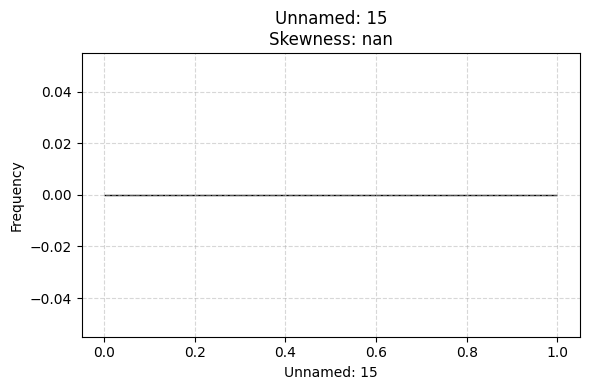

Unnamed: 15 Skewness: nan


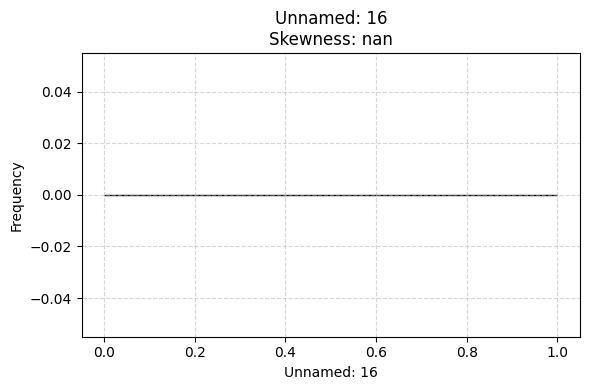

Unnamed: 16 Skewness: nan


In [75]:
from scipy.stats import skew
def plot_skewness_one_by_one(df_copy):
    # Drop non-numeric columns like 'Date'
    numeric_df = df.select_dtypes(include='number')

    # Loop through each numeric column
    for column in numeric_df.columns:
        col_skewness = skew(numeric_df[column].dropna())

        # Plot
        plt.figure(figsize=(6, 4))
        plt.hist(numeric_df[column].dropna(), bins=30, color='lightgreen', edgecolor='black')
        plt.title(f'{column}\nSkewness: {col_skewness:.2f}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()

        print(f"{column} Skewness: {col_skewness:.2f}")
plot_skewness_one_by_one(df_copy)

In [76]:
df_copy.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Hour
0,2004-03-10,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,18.0
1,2004-03-10,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,19.0
2,2004-03-10,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,20.0
3,2004-03-10,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,21.0
4,2004-03-10,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,22.0


In [77]:
df_copy = df_copy.drop('NMHC(GT)', axis=1)
df_copy

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Hour
0,2004-03-10,18.00.00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,18.0
1,2004-03-10,19.00.00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,19.0
2,2004-03-10,20.00.00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,20.0
3,2004-03-10,21.00.00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,21.0
4,2004-03-10,22.00.00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9353,2005-04-04,11.00.00,2.4,1163.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119,11.0
9354,2005-04-04,12.00.00,2.4,1142.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406,12.0
9355,2005-04-04,13.00.00,2.1,1003.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139,13.0
9356,2005-04-04,14.00.00,2.2,1071.0,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028,14.0


In [78]:
from warnings import filterwarnings
filterwarnings('ignore')

columns_to_fill = ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)',
                   'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
                   'PT08.S5(O3)', 'T', 'RH', 'AH']

for col in columns_to_fill:
    median_value = df_copy[col].median()
    df_copy[col].fillna(median_value, inplace=True)

In [79]:
df_copy.isnull().sum()

,0
Date,1
Time,1
CO(GT),0
PT08.S1(CO),0
C6H6(GT),0
PT08.S2(NMHC),0
NOx(GT),0
PT08.S3(NOx),0
NO2(GT),0
PT08.S4(NO2),0


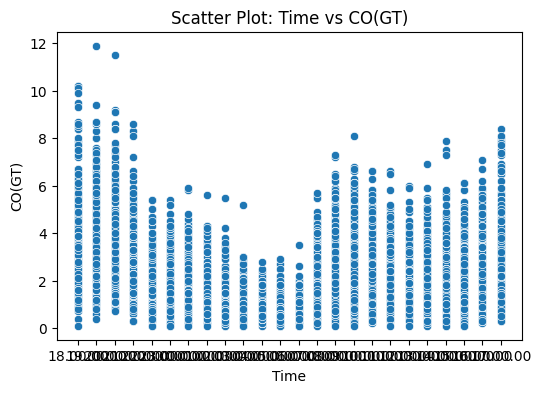

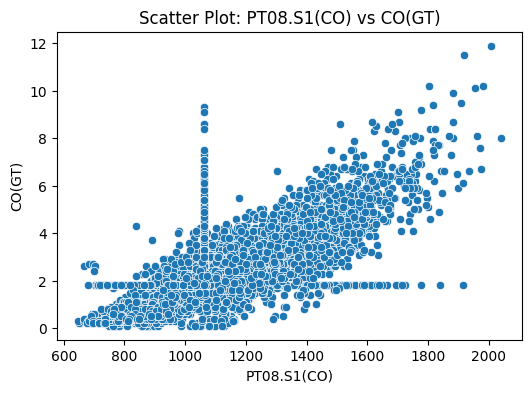

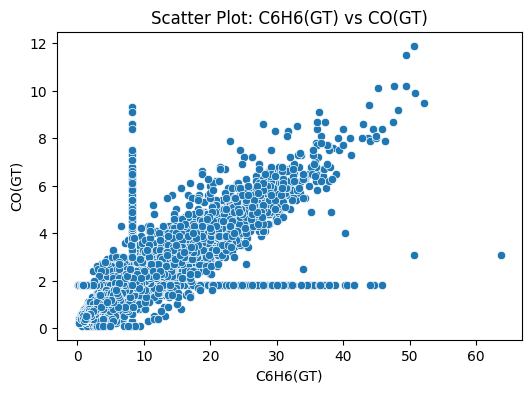

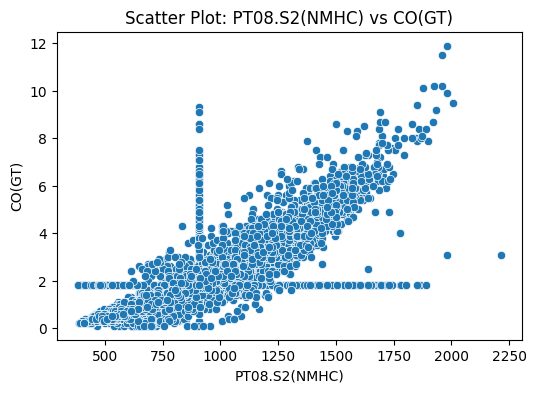

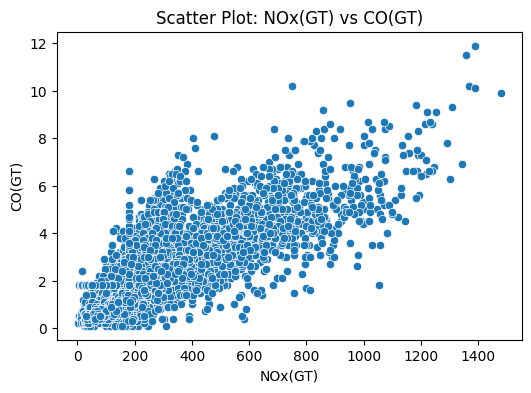

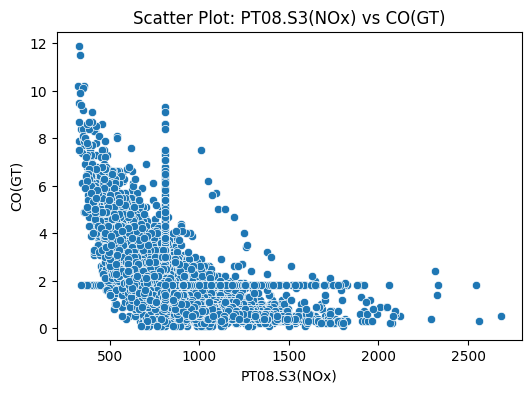

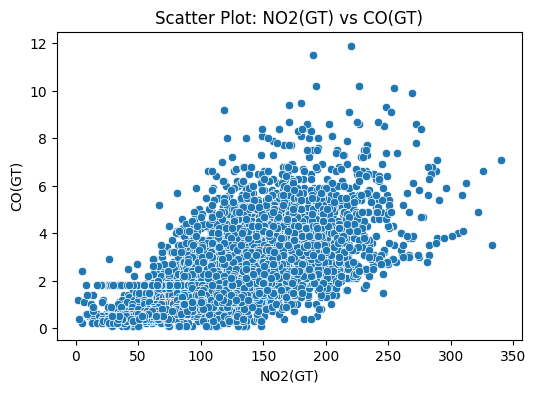

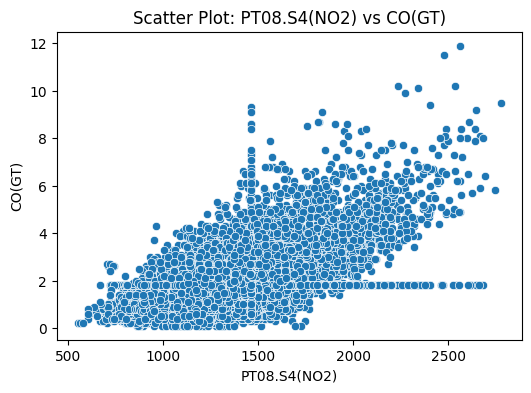

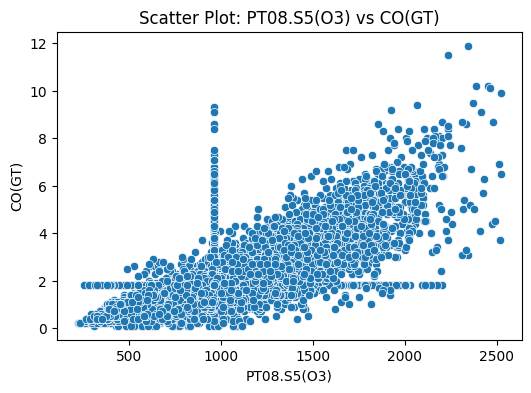

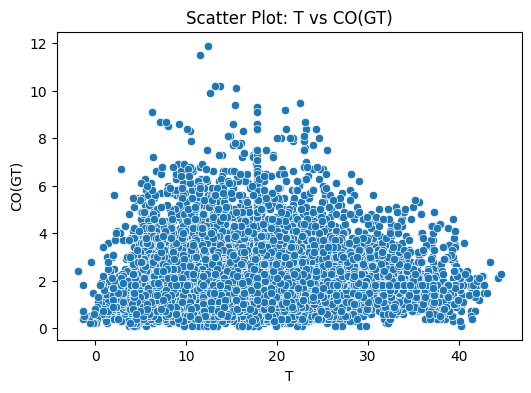

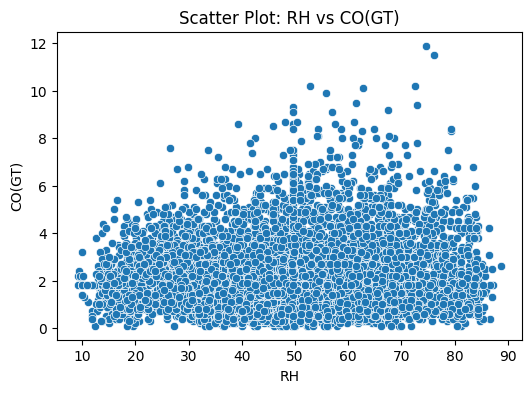

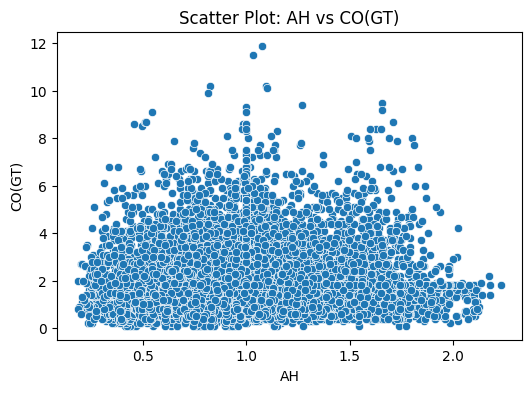

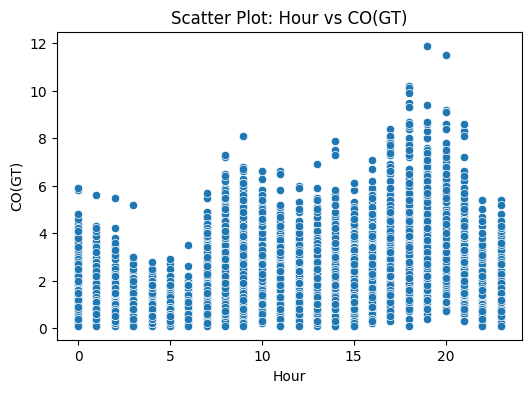

In [80]:
features = ['Time','PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)',
            'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)',
            'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'Hour']

for col in features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df_copy[col], y=df_copy['CO(GT)'])
    plt.xlabel(col)
    plt.ylabel('CO(GT)')
    plt.title(f'Scatter Plot: {col} vs CO(GT)')
    plt.show()

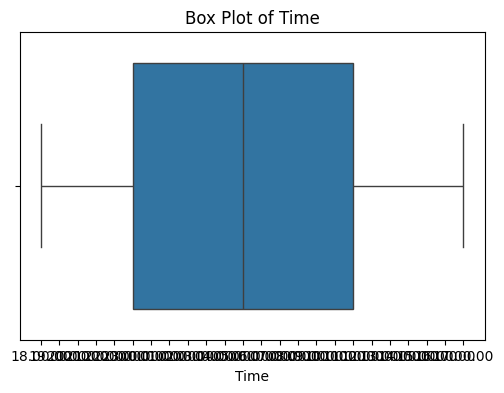

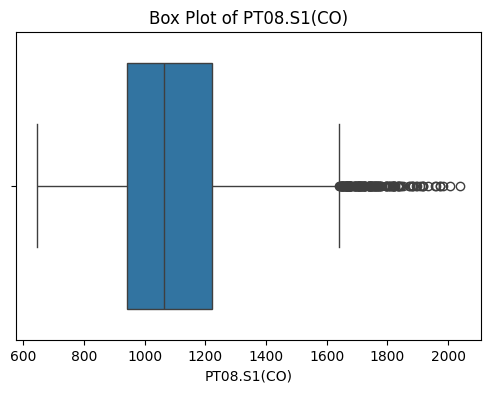

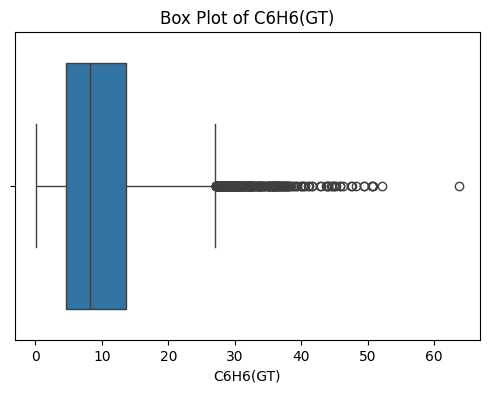

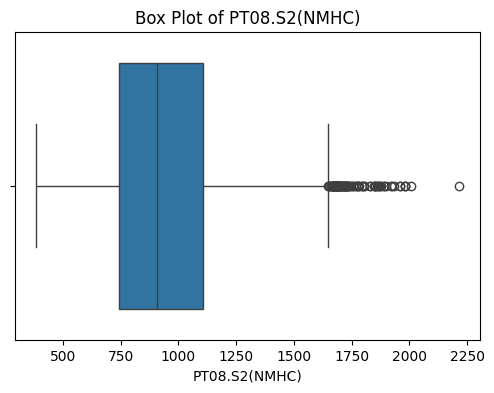

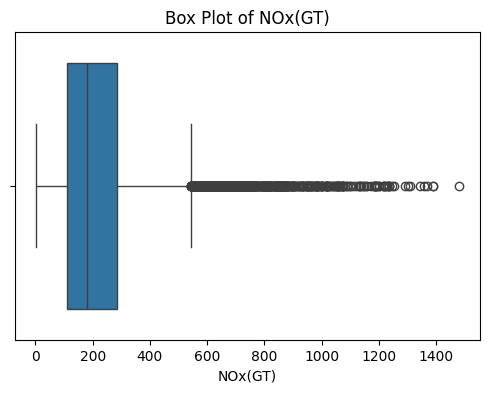

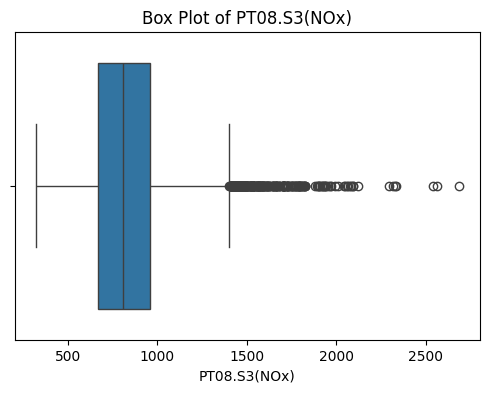

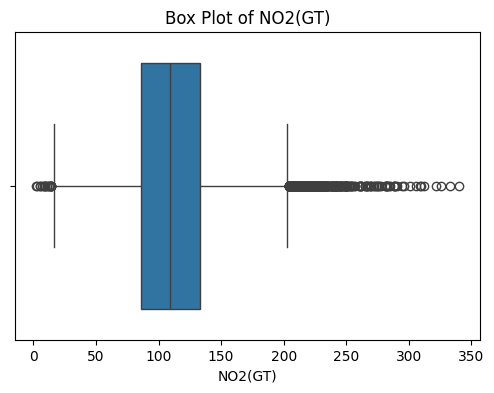

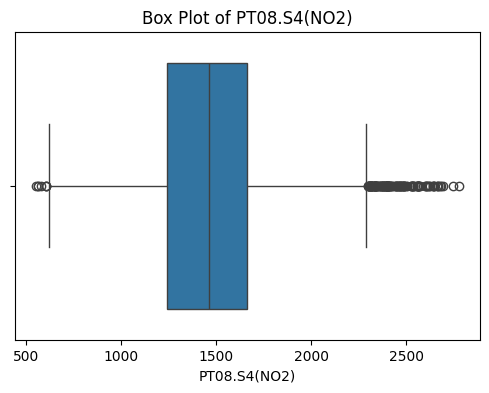

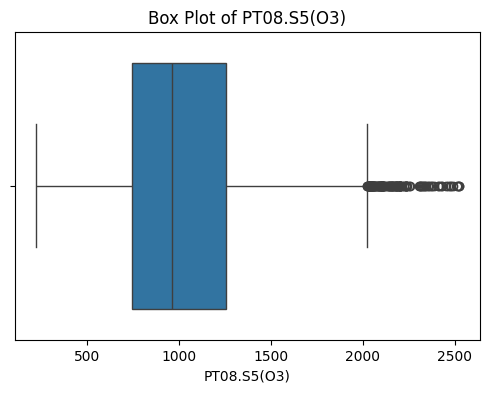

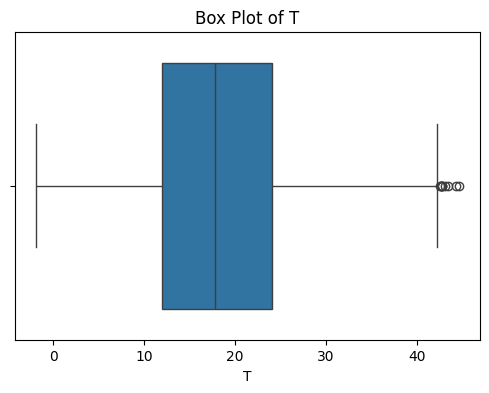

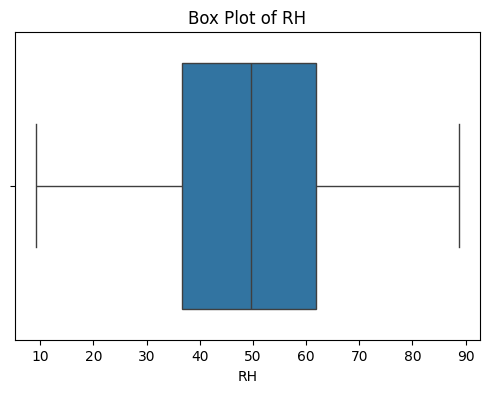

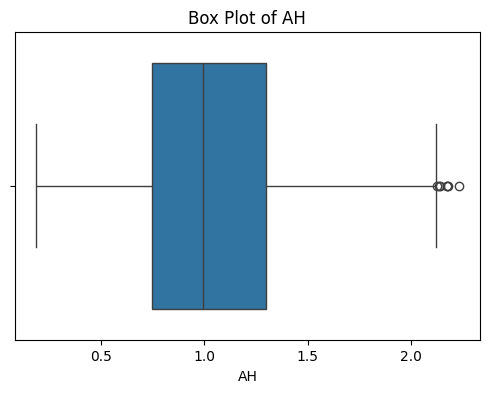

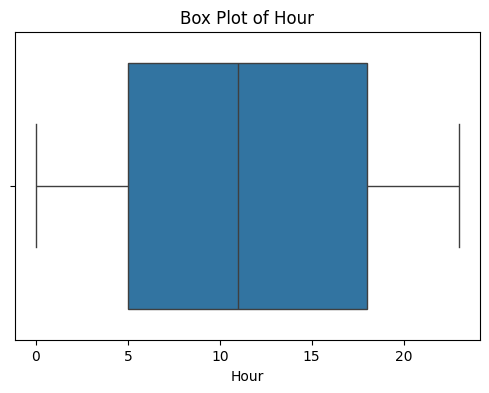

In [81]:
for col in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_copy[col])
    plt.xlabel(col)
    plt.title(f'Box Plot of {col}')
    plt.show()

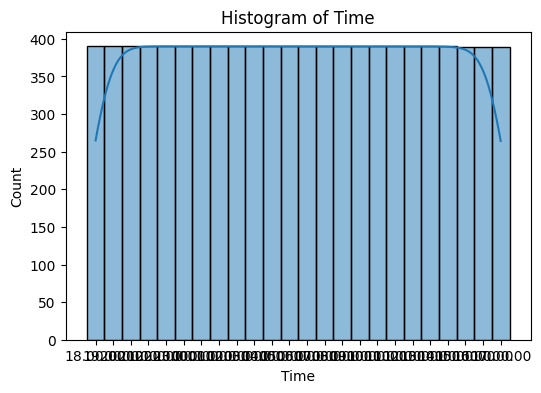

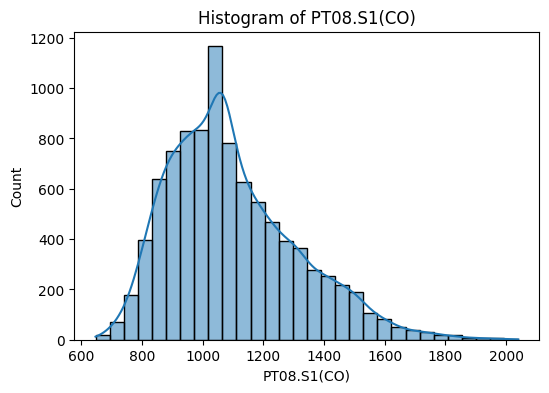

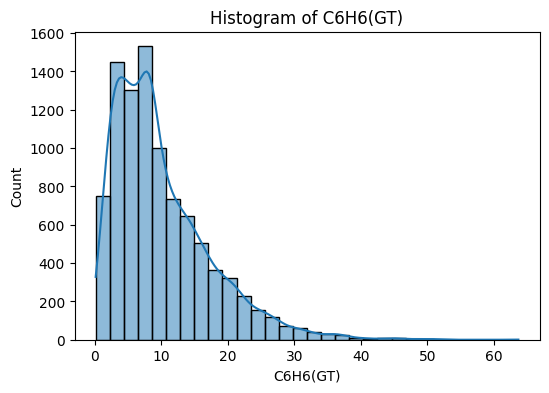

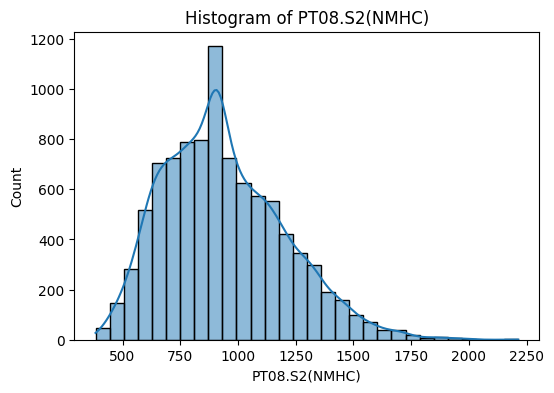

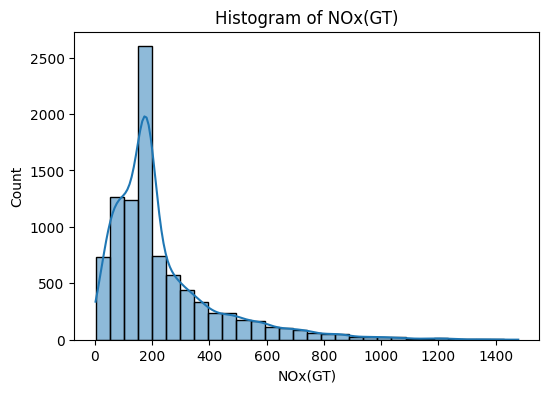

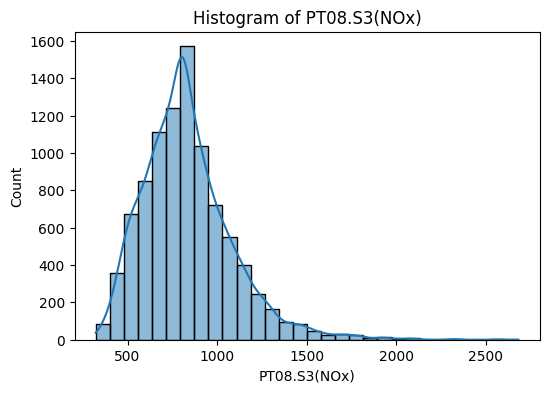

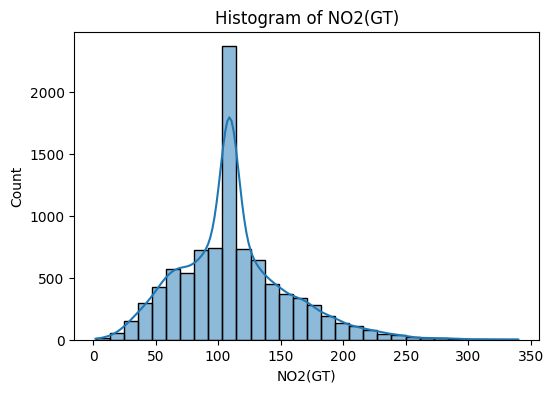

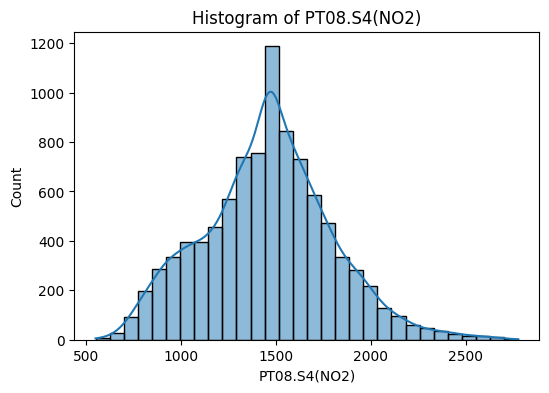

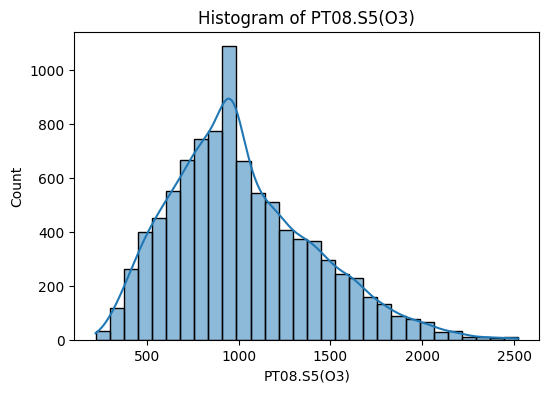

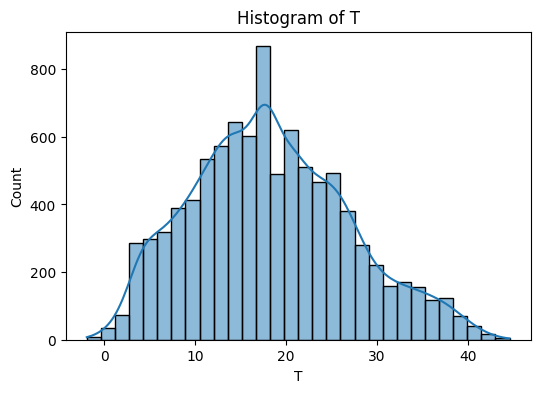

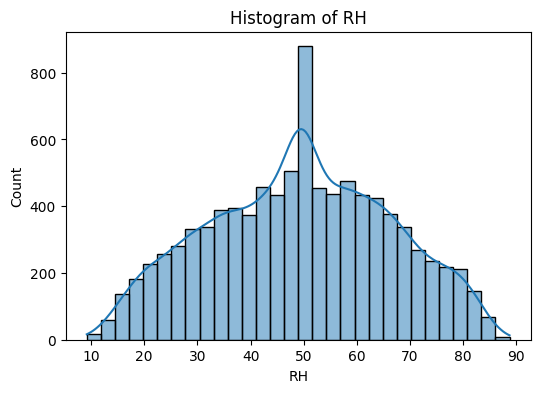

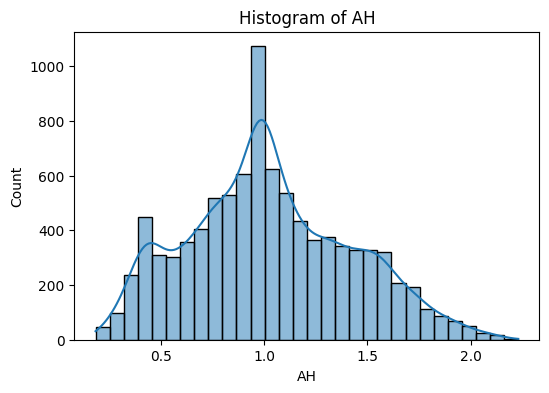

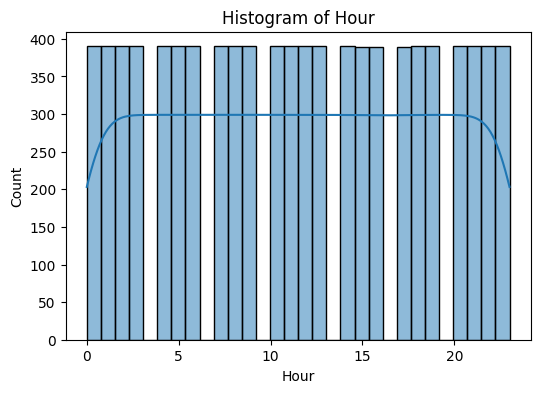

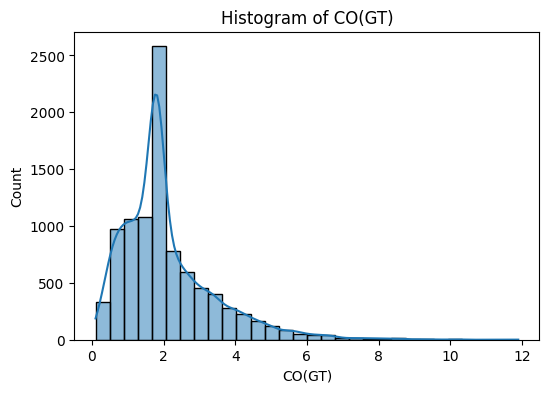

In [82]:
for col in features + ['CO(GT)']:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_copy[col], kde=True, bins=30)
    plt.xlabel(col)
    plt.title(f'Histogram of {col}')
    plt.show()

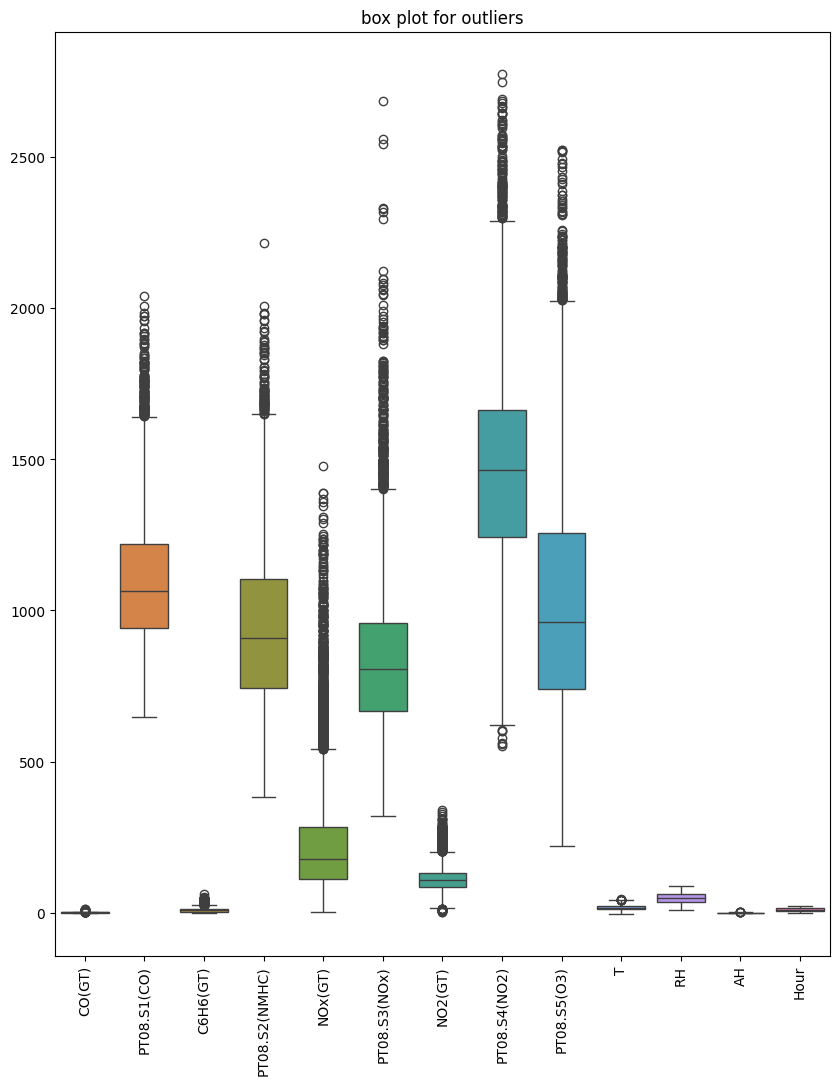

In [83]:
columns=['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)',
                   'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'Hour']

plt.figure(figsize=(10,12))
sns.boxplot(data=df_copy[columns])
plt.xticks(rotation=90)
plt.title('box plot for outliers')
plt.show()

In [84]:
data=df_copy[['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)',
                   'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'Hour']]
Q1=np.percentile(data,25)
Q3=np.percentile(data,75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
outliers = (data < lower_bound) | (data > upper_bound)
outliers_percentage=(outliers.sum()/len(data)) * 100
print(outliers_percentage)

CO(GT)           0.0
PT08.S1(CO)      0.0
C6H6(GT)         0.0
PT08.S2(NMHC)    0.0
NOx(GT)          0.0
PT08.S3(NOx)     0.0
NO2(GT)          0.0
PT08.S4(NO2)     0.0
PT08.S5(O3)      0.0
T                0.0
RH               0.0
AH               0.0
Hour             0.0
dtype: float64


In [85]:
from scipy.stats.mstats import winsorize
def winsorize_and_handle_missing(df, cols, limits=[0.05, 0.05]):
   df_copy2=df_copy.copy()
   for col in cols:
       df_copy2[col]=winsorize(df_copy2[col],limits=limits)
       df_copy2[col].fillna(df_copy2[col].median(), inplace=True)
   return df_copy2
columns_to_winsorize = ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)',
                        'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T',
                        'RH', 'AH', 'Hour']

# Assuming df is your original DataFrame
df_copy2 = winsorize_and_handle_missing(df_copy, columns_to_winsorize)

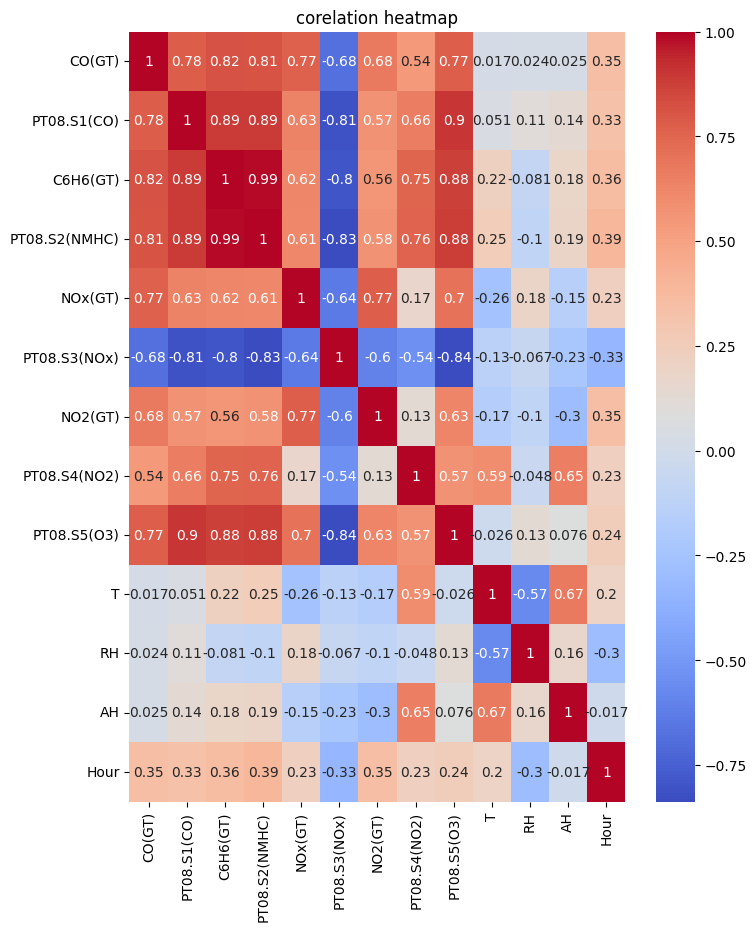

In [86]:
df_numeric=df_copy2.select_dtypes(include='number')
correlation_heat=df_numeric.corr()
plt.figure(figsize=(8,10))
sns.heatmap(correlation_heat, annot=True,cmap='coolwarm')
plt.title('corelation heatmap')
plt.show()

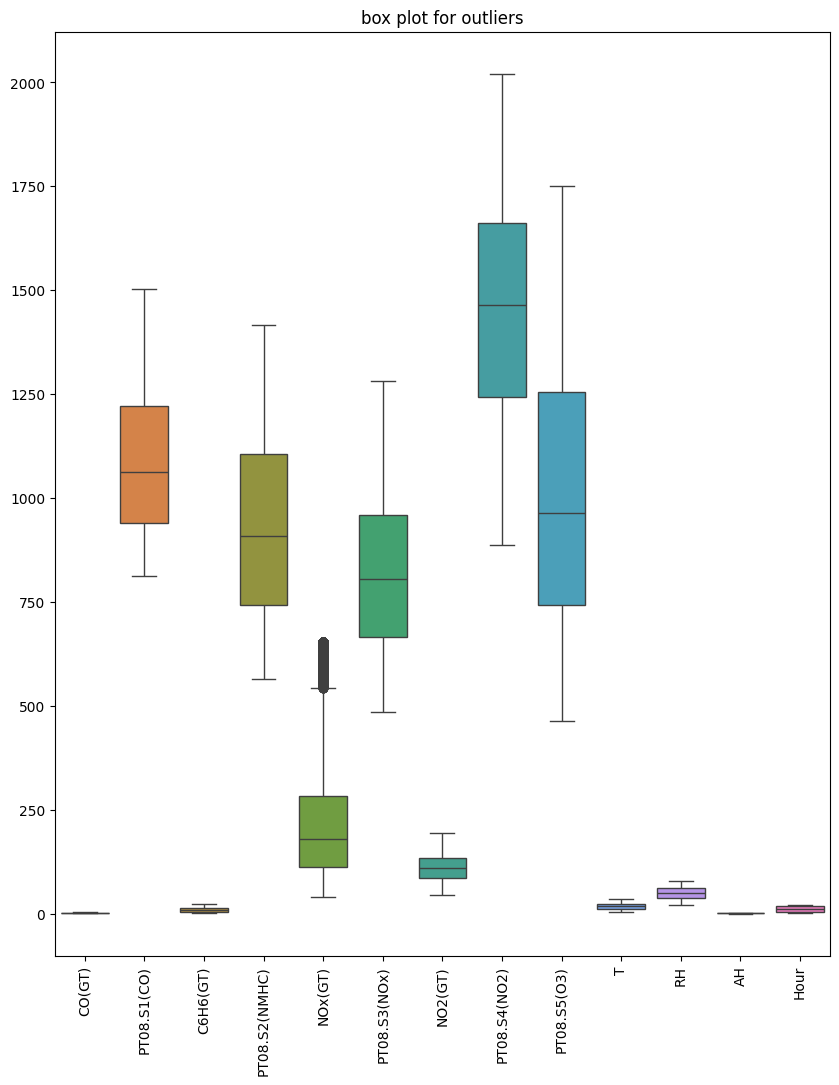

In [87]:
columns=['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)',
                   'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'Hour']

plt.figure(figsize=(10,12))
sns.boxplot(data=df_copy2[columns])
plt.xticks(rotation=90)
plt.title('box plot for outliers')
plt.show()

In [88]:
from sklearn.model_selection import train_test_split
df_copy2=df_copy2.select_dtypes(include='number')
X_train,X_test,y_train,y_test=train_test_split(df_copy2.drop('CO(GT)',axis=1),df_copy2['CO(GT)'],test_size=0.2,random_state=42)
corrmatrix=X_train.corr()
corrmatrix

,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Hour
PT08.S1(CO),1.000000,0.886741,0.889785,0.628855,-0.814733,0.566898,0.651919,0.900222,0.046817,0.104424,0.126459,0.320213
C6H6(GT),0.886741,1.000000,0.989415,0.613836,-0.794025,0.551476,0.743965,0.874121,0.216057,-0.087110,0.165672,0.353700
PT08.S2(NMHC),0.889785,0.989415,1.000000,0.609002,-0.829431,0.567787,0.750195,0.878792,0.243810,-0.109531,0.175645,0.388713
NOx(GT),0.628855,0.613836,0.609002,1.000000,-0.639845,0.771865,0.156848,0.700253,-0.263791,0.172525,-0.165159,0.222156
PT08.S3(NOx),-0.814733,-0.794025,-0.829431,-0.639845,1.000000,-0.597669,-0.527582,-0.836824,-0.123558,-0.061268,-0.215360,-0.326379
NO2(GT),0.566898,0.551476,0.567787,0.771865,-0.597669,1.000000,0.110449,0.625667,-0.175357,-0.109178,-0.311293,0.344068
PT08.S4(NO2),0.651919,0.743965,0.750195,0.156848,-0.527582,0.110449,1.000000,0.560359,0.592953,-0.046932,0.647585,0.219749
PT08.S5(O3),0.900222,0.874121,0.878792,0.700253,-0.836824,0.625667,0.560359,1.000000,-0.031611,0.119751,0.062951,0.234961
T,0.046817,0.216057,0.243810,-0.263791,-0.123558,-0.175357,0.592953,-0.031611,1.000000,-0.567201,0.674560,0.199352
RH,0.104424,-0.087110,-0.109531,0.172525,-0.061268,-0.109178,-0.046932,0.119751,-0.567201,1.000000,0.161947,-0.300909


In [89]:
def correlation(df,threshold):
  correlation_col=set()
  corr_matrix=df_copy2.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j])>threshold:
        colname=corr_matrix.columns[j]
        correlation_col.add(colname)
  return correlation_col
correlation(df_copy2,0.7)

{'C6H6(GT)',
 'CO(GT)',
 'NOx(GT)',
 'PT08.S1(CO)',
 'PT08.S2(NMHC)',
 'PT08.S3(NOx)'}

In [90]:
from sklearn.feature_selection import SelectPercentile,mutual_info_regression

X=df_copy2.drop(['CO(GT)'],axis=1)
y=df_copy2['CO(GT)']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
mutual=mutual_info_regression(X_train,y_train)
mutual=pd.Series(mutual)
mutual.index=X_train.columns
mutual.sort_values(ascending=False)
kbest=SelectPercentile(mutual_info_regression,percentile=30)
kbest.fit(X_train,y_train)
X_train.columns[kbest.get_support()]
X_train=kbest.transform(X_train)
X_train.shape
X_train=df_copy2


In [93]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [92]:
from sklearn.model_selection import cross_val_score

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    print(f"{name} Cross-Validation R² Scores: {scores}")
    print(f"{name} Mean R² Score: {scores.mean():.4f}")

ValueError: Found input variables with inconsistent numbers of samples: [9358, 7486]

In [94]:
X = df_copy2.drop(['CO(GT)'], axis=1)
y = df_copy2['CO(GT)']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features for linear models only
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Defining models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

# Cross-validation scores
for name, model in models.items():
    if name in ["Decision Tree", "Random Forest"]:
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')  # No scaling
    else:
        scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')  # Scaled

    print(f"{name} Cross-Validation R² Scores: {scores}")
    print(f"{name} Mean R² Score: {scores.mean():.4f}")

# Training and evaluation
for name, model in models.items():
    if name in ["Decision Tree", "Random Forest"]:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{name} Results:")
    print(f"  MSE: {mse:.4f}")
    print(f"  R² Score: {r2:.4f}")



Linear Regression Cross-Validation R² Scores: [0.78031425 0.81768739 0.83115741 0.80411414 0.7966436 ]
Linear Regression Mean R² Score: 0.8060
Ridge Cross-Validation R² Scores: [0.78031588 0.81767179 0.83116186 0.80413297 0.79664038]
Ridge Mean R² Score: 0.8060
Lasso Cross-Validation R² Scores: [0.74873144 0.78363553 0.79419058 0.77450323 0.76777862]
Lasso Mean R² Score: 0.7738
Decision Tree Cross-Validation R² Scores: [0.74629827 0.75793599 0.79544427 0.7786219  0.75131619]
Decision Tree Mean R² Score: 0.7659
Random Forest Cross-Validation R² Scores: [0.86090385 0.89160968 0.89913376 0.87111156 0.87184958]
Random Forest Mean R² Score: 0.8789
Linear Regression Results:
  MSE: 0.2340
  R² Score: 0.8238
Ridge Results:
  MSE: 0.2340
  R² Score: 0.8238
Lasso Results:
  MSE: 0.2856
  R² Score: 0.7850
Decision Tree Results:
  MSE: 0.2895
  R² Score: 0.7820
Random Forest Results:
  MSE: 0.1509
  R² Score: 0.8864


Linear Regression Results:
  MSE: 0.2340
  R² Score: 0.8238


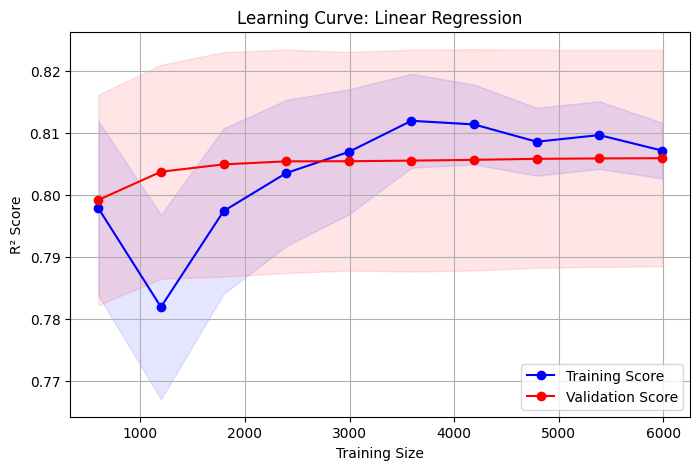

Ridge Results:
  MSE: 0.2340
  R² Score: 0.8238


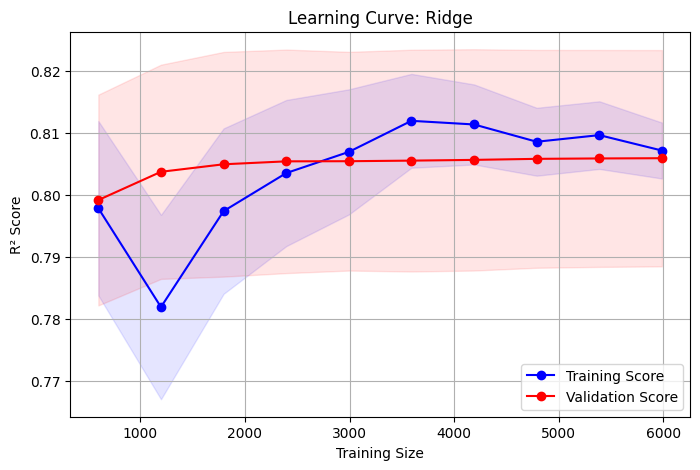

Lasso Results:
  MSE: 0.2402
  R² Score: 0.8192


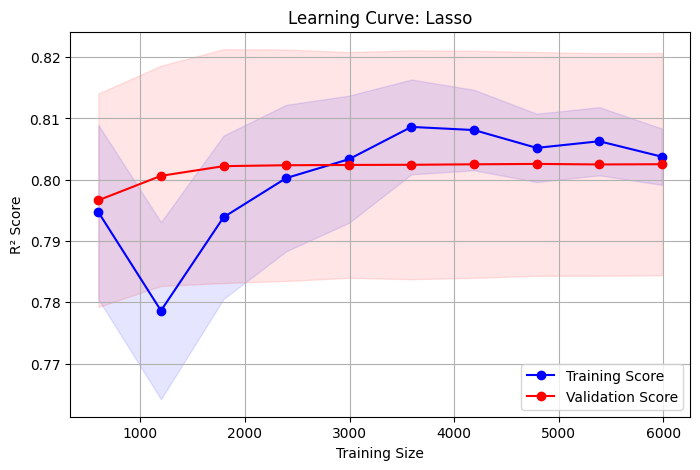

Decision Tree Results:
  MSE: 0.2810
  R² Score: 0.7884


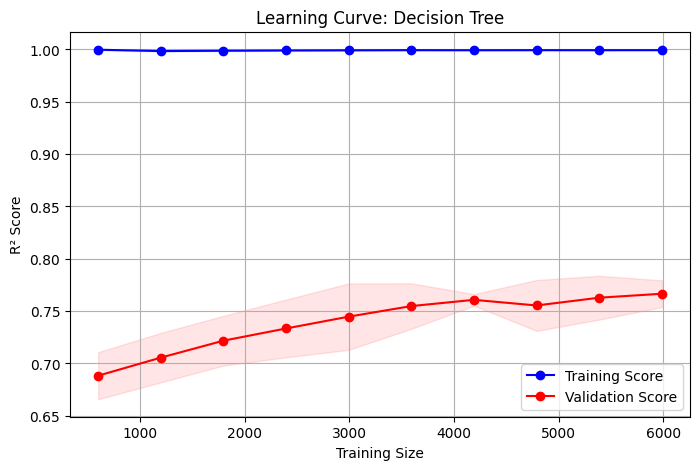

Random Forest Results:
  MSE: 0.1509
  R² Score: 0.8864


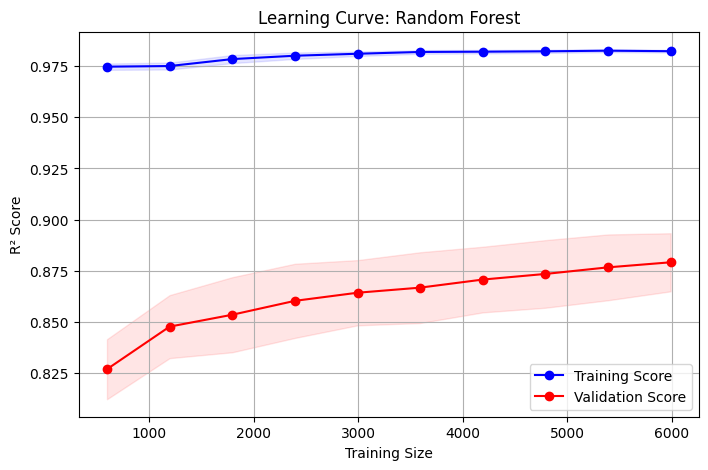

In [95]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(model, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, scoring="r2", train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
    )


    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)


    plt.figure(figsize=(8, 5))
    plt.plot(train_sizes, train_mean, "o-", color="blue", label="Training Score")
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")

    plt.plot(train_sizes, test_mean, "o-", color="red", label="Validation Score")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="red")

    plt.xlabel("Training Size")
    plt.ylabel("R² Score")
    plt.title(f"Learning Curve: {title}")
    plt.legend()
    plt.grid()
    plt.show()


for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{name} Results:")
    print(f"  MSE: {mse:.4f}")
    print(f"  R² Score: {r2:.4f}")


    plot_learning_curve(model, X_train, y_train, name)